<a href="https://colab.research.google.com/github/anggerharyo/Final-Task_ID-X-Partners_Angger-Haryo-Putranto/blob/main/Final_Task_ID_X_Partners_Data_Scientist_Angger_Haryo_Putranto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Study Case ID/X Partners [Final Task] Prediction Model**

## Goals: Membuat analisis data dan prediksi model untuk  memprediksi risiko kredit (credit risk) berdasarkan dataset yang disediakan, yang mencakup data pinjaman yang disetujui dan ditolak.

# **Import Library**

In [ ]:
# Impor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


# **Data Collection**

In [2]:
# Membaca file CSV
data = pd.read_csv('loan_data_2007_2014 (1).csv') # Membaca file CSV
df = pd.DataFrame(data)
df.head(10)

<ipython-input-2-e2d3159c8c58>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014 (1).csv') # Membaca file CSV


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Understanding**

## **Exploratory Data Analysis (EDA)**

In [3]:
# Menampilkan jumlah baris dan kolom
num_rows, num_cols = data.shape
print(f"Jumlah baris: {num_rows}")
print(f"Jumlah kolom: {num_cols}")

Jumlah baris: 466285
Jumlah kolom: 75


In [4]:
7# Menampilkan nama kolom, jumlah, dan tipe datanya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
# Memilih kolom numerik dan non-numerik
numeric_cols = data.select_dtypes(include=['number']).dtypes
non_numeric_cols = data.select_dtypes(include=['object']).dtypes

# Menentukan lebar maksimum untuk perataan teks
max_len_num = max(len(col) for col in numeric_cols.keys()) if not numeric_cols.empty else 0
max_len_nonnum = max(len(col) for col in non_numeric_cols.keys()) if not non_numeric_cols.empty else 0

# Menampilkan hasil
print("Kolom Numerik:")
for col, dtype in numeric_cols.items():
    print(f"{col.ljust(max_len_num + 2)}: {dtype}")
print(f"Total kolom numerik: {len(numeric_cols)}")

print("\nKolom Non-Numerik:")
for col, dtype in non_numeric_cols.items():
    print(f"{col.ljust(max_len_nonnum + 2)}: {dtype}")
print(f"Total kolom non-numerik: {len(non_numeric_cols)}")

Kolom Numerik:
Unnamed: 0                   : int64
id                           : int64
member_id                    : int64
loan_amnt                    : int64
funded_amnt                  : int64
funded_amnt_inv              : float64
int_rate                     : float64
installment                  : float64
annual_inc                   : float64
dti                          : float64
delinq_2yrs                  : float64
inq_last_6mths               : float64
mths_since_last_delinq       : float64
mths_since_last_record       : float64
open_acc                     : float64
pub_rec                      : float64
revol_bal                    : int64
revol_util                   : float64
total_acc                    : float64
out_prncp                    : float64
out_prncp_inv                : float64
total_pymnt                  : float64
total_pymnt_inv              : float64
total_rec_prncp              : float64
total_rec_int                : float64
total_rec_late_fee    

In [6]:
# Mengecek jumlah nilai yang hilang per kolom
missing_values = data.isnull().sum()

# Menampilkan hanya kolom yang memiliki nilai hilang
missing_values = missing_values[missing_values > 0]

# Menampilkan hasil
if missing_values.empty:
    print("Tidak ada data yang hilang dalam dataset.")
else:
    print("Kolom dengan data hilang:")
    for col, missing in missing_values.items():
        print(f"{col.ljust(30)}: {missing} nilai hilang")

Kolom dengan data hilang:
emp_title                     : 27588 nilai hilang
emp_length                    : 21008 nilai hilang
annual_inc                    : 4 nilai hilang
desc                          : 340304 nilai hilang
title                         : 21 nilai hilang
delinq_2yrs                   : 29 nilai hilang
earliest_cr_line              : 29 nilai hilang
inq_last_6mths                : 29 nilai hilang
mths_since_last_delinq        : 250351 nilai hilang
mths_since_last_record        : 403647 nilai hilang
open_acc                      : 29 nilai hilang
pub_rec                       : 29 nilai hilang
revol_util                    : 340 nilai hilang
total_acc                     : 29 nilai hilang
last_pymnt_d                  : 376 nilai hilang
next_pymnt_d                  : 227214 nilai hilang
last_credit_pull_d            : 42 nilai hilang
collections_12_mths_ex_med    : 145 nilai hilang
mths_since_last_major_derog   : 367311 nilai hilang
annual_inc_joint              : 46

In [7]:
# Mengecek jumlah duplikasi baris dalam dataset
duplicate_rows = data.duplicated().sum()

# Menampilkan hasil
if duplicate_rows > 0:
    print(f"Ada {duplicate_rows} baris duplikat dalam dataset.")
else:
    print("Tidak ada data duplikat dalam dataset.")

Tidak ada data duplikat dalam dataset.


In [8]:
# Menampilkan beberapa baris pertama dataset
data.head(15)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Top 10 pasangan kolom dengan korelasi tertinggi:
out_prncp_inv dan out_prncp dengan korelasi 1.00
funded_amnt dan loan_amnt dengan korelasi 1.00
member_id dan id dengan korelasi 1.00
funded_amnt_inv dan funded_amnt dengan korelasi 1.00
total_pymnt_inv dan total_pymnt dengan korelasi 1.00
funded_amnt_inv dan loan_amnt dengan korelasi 0.99
total_rec_prncp dan total_pymnt dengan korelasi 0.96
total_rec_prncp dan total_pymnt_inv dengan korelasi 0.95
installment dan funded_amnt dengan korelasi 0.95
installment dan loan_amnt dengan korelasi 0.95


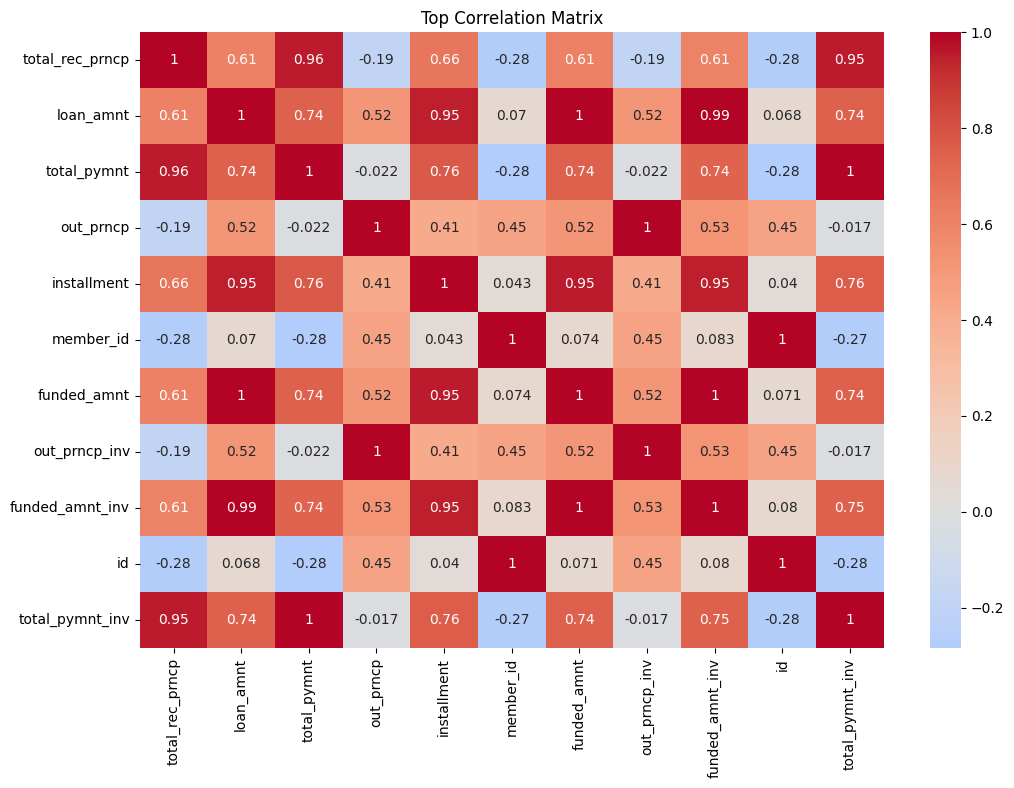

In [9]:
# Memilih kolom numerik
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_cols.corr()

# Menemukan pasangan kolom dengan korelasi absolut tertinggi
def get_top_correlations(corr_matrix, n=10):
    pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            pairs.append((corr_matrix.iloc[i, j], corr_matrix.columns[i], corr_matrix.columns[j]))
    pairs.sort(key=lambda x: abs(x[0]), reverse=True)
    return pairs[:n]

# Mendapatkan 10 pasangan kolom dengan korelasi tertinggi
top_correlations = get_top_correlations(correlation_matrix, n=10)

# Menampilkan pasangan kolom dengan korelasi tinggi
print("Top 10 pasangan kolom dengan korelasi tertinggi:")
for corr, col1, col2 in top_correlations:
    print(f"{col1} dan {col2} dengan korelasi {corr:.2f}")

# Membuat daftar kolom unik dari pasangan teratas
top_columns = list(set([col for _, col1, col2 in top_correlations for col in (col1, col2)]))

# Menampilkan heatmap untuk kolom dengan korelasi tertinggi
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Top Correlation Matrix')
plt.show()

### Univariat ###

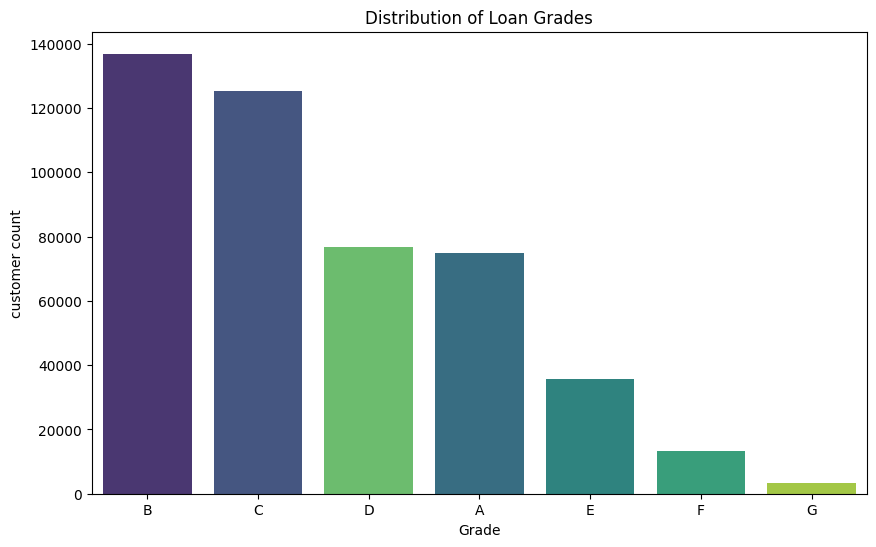

In [10]:
# Membuat bar plot dengan warna berbeda untuk setiap kategori
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='grade', order=data['grade'].value_counts().index, hue='grade', palette='viridis', legend=False)

# Mengubah label sumbu dan judul
plt.xlabel('Grade')
plt.ylabel('customer count')
plt.title('Distribution of Loan Grades')

# Menampilkan plot
plt.show()

<ipython-input-11-7a75def44bdc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values, palette="viridis")


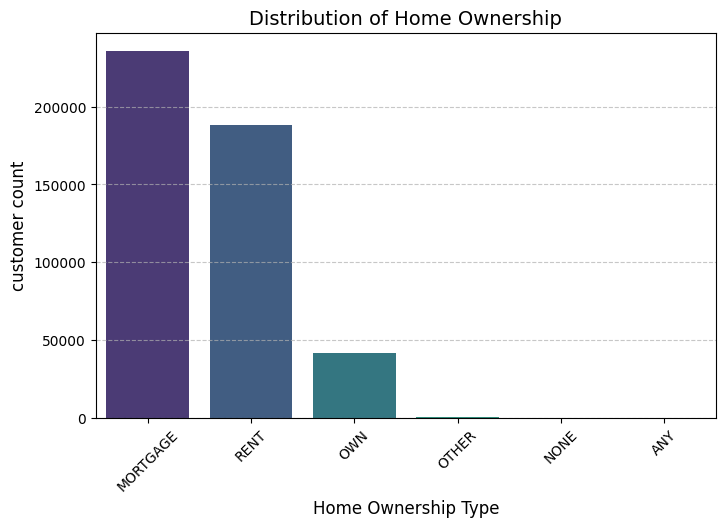

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah masing-masing kategori dalam home_ownership
home_ownership_counts = data['home_ownership'].value_counts()

# Membuat plot
plt.figure(figsize=(8, 5))
sns.barplot(x=home_ownership_counts.index, y=home_ownership_counts.values, palette="viridis")

# Menambahkan judul dan label
plt.title("Distribution of Home Ownership", fontsize=14)
plt.xlabel("Home Ownership Type", fontsize=12)
plt.ylabel("customer count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


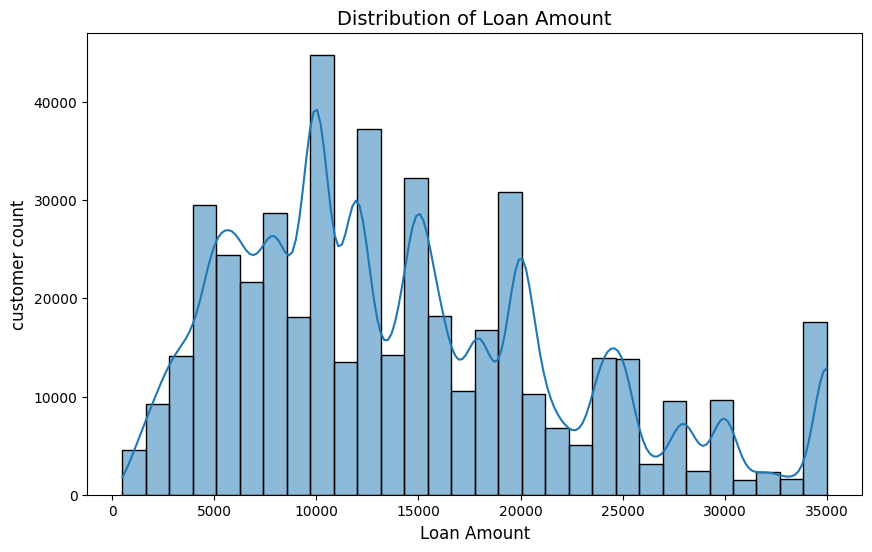

In [12]:
# Analisis univariat loan amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=30, kde=True)

plt.title('Distribution of Loan Amount', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('customer count', fontsize=12)  #
plt.show()

<ipython-input-13-cb8970ef2b61>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verification_status_counts.index, y=verification_status_counts.values, palette="magma")


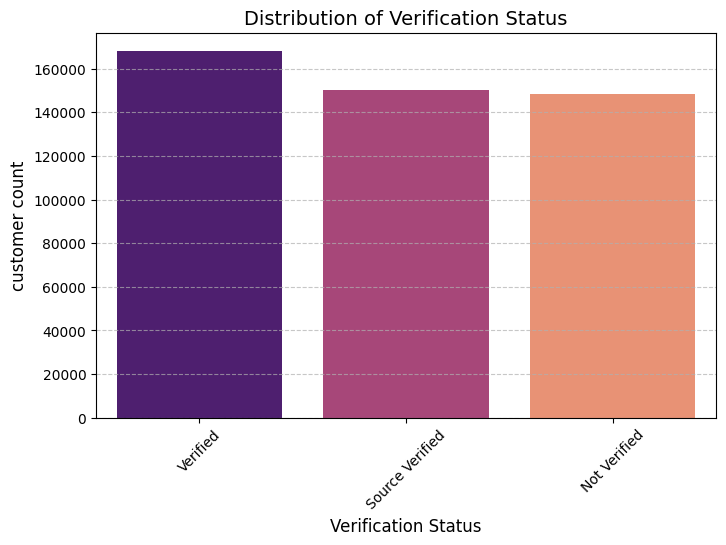

In [13]:
# Menghitung masing-masing kolom dalam verification_status
verification_status_counts = data['verification_status'].value_counts()

# membuat plot
plt.figure(figsize=(8, 5))
sns.barplot(x=verification_status_counts.index, y=verification_status_counts.values, palette="magma")

# Menambahkan judul dan label
plt.title("Distribution of Verification Status", fontsize=14)
plt.xlabel("Verification Status", fontsize=12)
plt.ylabel("customer count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


### Bivariat ###

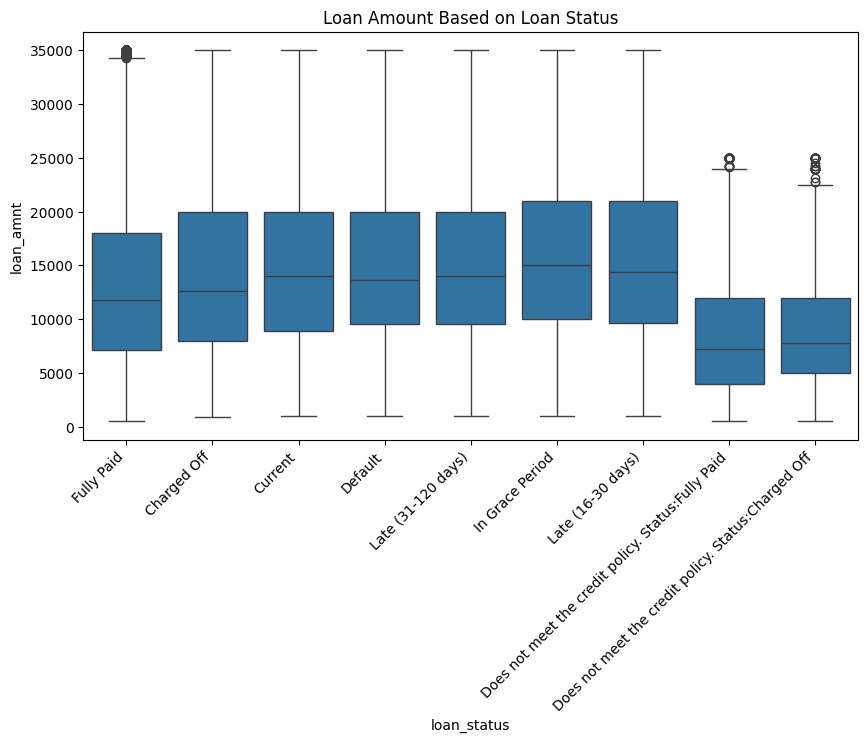

In [15]:
# Analisis bivariat
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount Based on Loan Status')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)  # Menambahkan margin bawah jika label masih terpotong
plt.show()

# **Data Preparation**

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values[missing_values > 0]}")

Missing values:
emp_title                       10747
emp_length                       6821
annual_inc                          4
desc                            96170
title                              19
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq          99098
mths_since_last_record         151852
open_acc                           29
pub_rec                            29
revol_util                        167
total_acc                          29
collection_recovery_fee             1
last_pymnt_d                      170
last_pymnt_amnt                     1
next_pymnt_d                   103393
last_credit_pull_d                 16
collections_12_mths_ex_med        146
mths_since_last_major_derog    144442
policy_code                         1
application_type                    1
annual_inc_joint               170229
dti_joint                      170229
verification_status_joint      170

In [ ]:
# Menangani nilai yang hilang
# Menghapus kolom yang sebagian besar nilai-nya hilang
df = df.dropna(thresh=len(df) * 0.5, axis=1)

In [ ]:
# Mengisi nilai yang hilang untuk kolom numerik dengan median
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='median')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

In [ ]:
# Mengisi nilai yang hilang untuk kolom kategorikal dengan modus
categorical_cols = df.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [ ]:
# Mengatasi outlier menggunakan IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# Identifikasi kolom performa kredit
label_col = 'loan_status'

In [ ]:
# Menghapus kolom 'loan_status' dari fitur
X = df.drop(columns=[label_col])
y = df[label_col]

In [ ]:
# Melakukan encoding pada label jika perlu
# Misalnya, kita mengubah status kredit menjadi biner (GOOD atau BAD)
y = y.map({'Fully Paid': 'GOOD', 'Charged Off': 'BAD', 'Default': 'BAD'}).fillna('GOOD')
y = y.map({'GOOD': 1, 'BAD': 0})

In [ ]:
# Membagi data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#**Data Modelling & Evaluation**

In [ ]:
# Encoding variabel kategorikal dan scaling variabel numerik
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(include=[object]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Pipeline untuk preprocessing
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocessing data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Membangun pipeline untuk Logistic Regression
pipeline_lr = Pipeline(steps=[('model', LogisticRegression(max_iter=1000, solver='lbfgs'))])

# Membangun pipeline untuk Random Forest
pipeline_rf = Pipeline(steps=[('model', RandomForestClassifier())])

# Grid search untuk Logistic Regression
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10]
}
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=3, scoring='roc_auc')
grid_search_lr.fit(X_train_preprocessed, y_train)

# Grid search untuk Random Forest
param_grid_rf = {
    'model__n_estimators': [100],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='roc_auc')
grid_search_rf.fit(X_train_preprocessed, y_train)

# Evaluasi model
model_results = {
    'Model': [],
    'Dataset': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC': []
}

models = {
    'Logistic Regression': grid_search_lr,
    'Random Forest': grid_search_rf
}

for model_name, model in models.items():
    for dataset, (X, y) in [('Training', (X_train_preprocessed, y_train)), ('Test', (X_test_preprocessed, y_test))]:
        y_pred = model.predict(X)
        model_results['Model'].append(model_name)
        model_results['Dataset'].append(dataset)
        model_results['Accuracy'].append(accuracy_score(y, y_pred))
        model_results['Precision'].append(precision_score(y, y_pred))
        model_results['Recall'].append(recall_score(y, y_pred))
        model_results['ROC AUC'].append(roc_auc_score(y, y_pred))

# Menampilkan hasil evaluasi dalam tabel
results_df = pd.DataFrame(model_results)
print(results_df)

# Menampilkan confusion matrix dan classification report untuk setiap model pada test set
for model_name, model in models.items():
    y_pred_test = model.predict(X_test_preprocessed)
    print(f"\nModel: {model_name}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    print("-" * 80)

print("Modelling selesai.")


                 Model   Dataset  Accuracy  Precision    Recall   ROC AUC
0  Logistic Regression  Training  0.999398   0.999586  0.999774  0.996609
1  Logistic Regression      Test  0.995752   0.996247  0.999247  0.969862
2        Random Forest  Training  0.998478   0.998384  1.000000  0.987187
3        Random Forest      Test  0.958086   0.957336  1.000000  0.647619

Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       420
           1       1.00      1.00      1.00      6642

    accuracy                           1.00      7062
   macro avg       0.99      0.97      0.98      7062
weighted avg       1.00      1.00      1.00      7062


Confusion Matrix:
[[ 395   25]
 [   5 6637]]
--------------------------------------------------------------------------------

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       1.00


Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       420
           1       1.00      1.00      1.00      6642

    accuracy                           1.00      7062
   macro avg       0.99      0.97      0.98      7062
weighted avg       1.00      1.00      1.00      7062



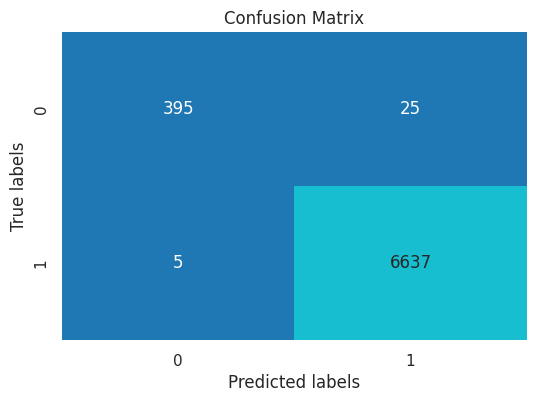

--------------------------------------------------------------------------------

Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46       420
           1       0.96      1.00      0.98      6642

    accuracy                           0.96      7062
   macro avg       0.98      0.65      0.72      7062
weighted avg       0.96      0.96      0.95      7062



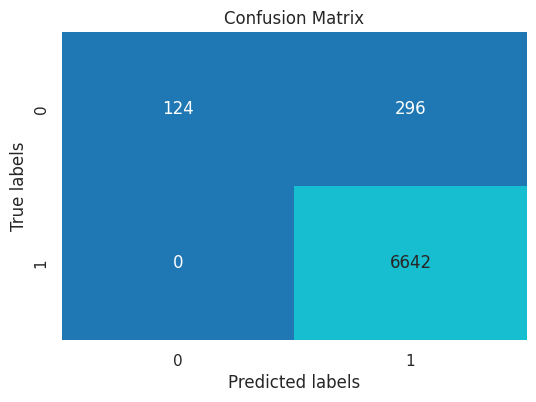

--------------------------------------------------------------------------------
Modelling selesai.


In [ ]:
# Menampilkan confusion matrix dan classification report untuk setiap model pada test set
for model_name, model in models.items():
    y_pred_test = model.predict(X_test_preprocessed)
    print(f"\nModel: {model_name}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Membuat heatmap dengan peta warna 'tab10'
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='tab10', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    print("-" * 80)

print("Modelling selesai.")


